In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
from google.colab import files
upload=files.upload()

Saving winequality-red1.csv to winequality-red1.csv


In [53]:
df=pd.read_csv('winequality-red1.csv')

In [54]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)


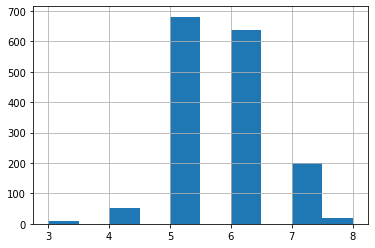

In [55]:
print(df.shape)
df['quality'].hist()

In [56]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

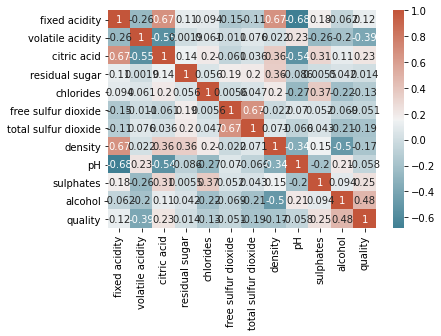

In [57]:

corr=df.corr()
#matplotlib.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [58]:
df['quality']=[1 if x>=7 else 0 for x in df['quality']]


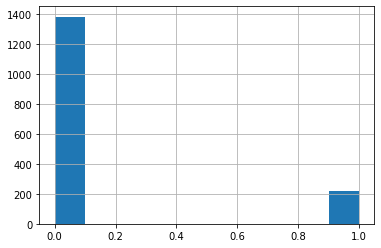

In [59]:
df['quality'].hist()

In [60]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [61]:
X=df.drop(['quality'],1)
y=df['quality']

In [63]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [64]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [65]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [66]:
m1=DecisionTreeClassifier()
m1.fit(X_train,y_train)
ypred1=m1.predict(X_test)


In [67]:
print(classification_report(ypred1,y_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       340
           1       0.73      0.55      0.63        60

    accuracy                           0.90       400
   macro avg       0.83      0.76      0.79       400
weighted avg       0.90      0.90      0.90       400



In [68]:
from sklearn.ensemble import RandomForestClassifier
m2 = RandomForestClassifier(random_state=1)
m2.fit(X_train, y_train)
y_pred2 = m2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.68      0.58      0.63        45

    accuracy                           0.92       400
   macro avg       0.82      0.77      0.79       400
weighted avg       0.92      0.92      0.92       400



In [71]:
import xgboost as xgb
m3 = xgb.XGBClassifier()
m3.fit(X_train, y_train)
y_pred3 = m3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       355
           1       0.57      0.56      0.56        45

    accuracy                           0.90       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.90      0.90      0.90       400



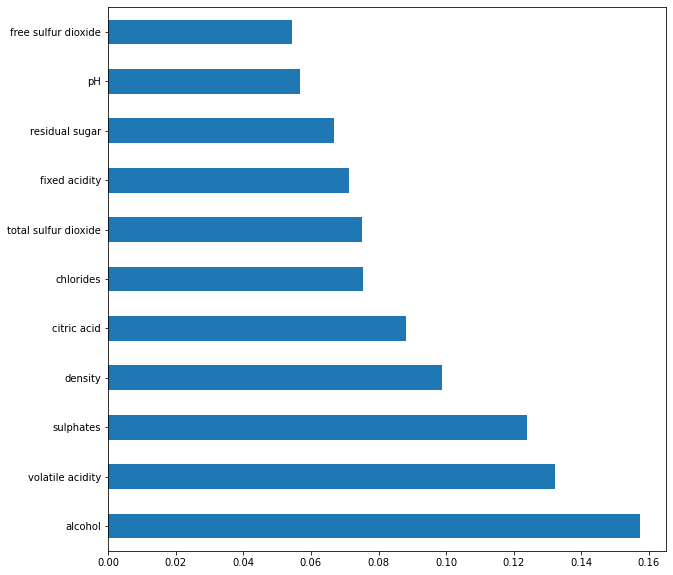

In [72]:
feat_importances = pd.Series(m2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(20).plot(kind='barh',figsize=(10,10))